# TER Project : Representing patient history with LLMs

*Authors* : Amine ELHANA, Sarah LAKHZOUM, Abdelbadie Dhiaeddine NESSAS

This notebook contains the exploratory phase of this project.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
patient_df = pd.read_csv("../data/df_char (1).csv")
patient_df

,Unnamed: 0,ID_PATIENT,AGE_DIAG,Nodal_Status,Mastectomy,Partial_Mastectomy,Surgery,CT,CT_Setting,CT_Regimen,...,RT_Setting,TT,TT_Setting,ET,ET_Setting,ET_Treatment,ET_Regimen,Age_range,Pathway,BC_SubType
0,0,10127015029441953,94,0,1,0,1,0,No,No,...,No,0,No,0,No,No ET,No ET,>=70,1,Unknown
1,1,10128002810515666,93,0,0,1,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,4,Luminal
2,2,10128024250701935,93,1,0,1,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,AI,Unitherapy,>=70,4,Luminal
3,3,10128033549936740,93,0,0,1,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,4,Luminal
4,4,10128064000854625,93,0,1,0,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,4,Luminal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,11293018005167785,28,0,1,0,1,1,Neoadjuvant,Bitherapy,...,Adjuvant,0,No,1,Adjuvant,Tamoxifen followed by AI,Bitherapy,<50,5,Luminal
149996,149996,11293022113785146,28,1,0,1,1,0,No,No,...,Adjuvant,0,No,1,Adjuvant,AI,Unitherapy,<50,4,Luminal
149997,149997,11294021242399597,27,0,0,1,1,1,Adjuvant,Bitherapy,...,Adjuvant,0,No,0,No,No ET,No ET,<50,9,TNBC
149998,149998,11294080294882827,27,1,1,0,1,1,Adjuvant,Bitherapy,...,Adjuvant,0,No,1,Adjuvant,AI,Unitherapy,<50,10,Luminal


- CT : chemotherapy
- RT : radiotherapy
- TT : Testosterone therapy
- ET : endocrine therapy
- BC_SubType : breast cancer sub type

In [7]:
patient_df.nunique()

Unnamed: 0            150000
ID_PATIENT            150000
AGE_DIAG                  76
Nodal_Status               2
Mastectomy                 2
Partial_Mastectomy         2
Surgery                    1
CT                         2
CT_Setting                 3
CT_Regimen                 3
RT                         2
RT_Setting                 2
TT                         2
TT_Setting                 3
ET                         2
ET_Setting                 2
ET_Treatment               7
ET_Regimen                 3
Age_range                  4
Pathway                   10
BC_SubType                 4
dtype: int64

In [8]:
patient_df_dropped = patient_df.drop(['Unnamed: 0', 'ID_PATIENT', 'AGE_DIAG', 'Surgery'], axis=1)
cols = patient_df_dropped.columns
for col in cols:
    print(f'Column : {col}')
    print(patient_df_dropped[col].value_counts())
    print("\n")

Column : Nodal_Status
0    122299
1     27701
Name: Nodal_Status, dtype: int64


Column : Mastectomy
1    89807
0    60193
Name: Mastectomy, dtype: int64


Column : Partial_Mastectomy
0    89807
1    60193
Name: Partial_Mastectomy, dtype: int64


Column : CT
0    91566
1    58434
Name: CT, dtype: int64


Column : CT_Setting
No             91566
Adjuvant       48118
Neoadjuvant    10316
Name: CT_Setting, dtype: int64


Column : CT_Regimen
No            91566
Unitherapy    33912
Bitherapy     24522
Name: CT_Regimen, dtype: int64


Column : RT
1    131948
0     18052
Name: RT, dtype: int64


Column : RT_Setting
Adjuvant    131948
No           18052
Name: RT_Setting, dtype: int64


Column : TT
0    138061
1     11939
Name: TT, dtype: int64


Column : TT_Setting
No             138061
Adjuvant         9009
Neoadjuvant      2930
Name: TT_Setting, dtype: int64


Column : ET
1    107220
0     42780
Name: ET, dtype: int64


Column : ET_Setting
Adjuvant    107220
No           42780
Name: ET_Setti

Text(0, 0.5, 'Frequency')

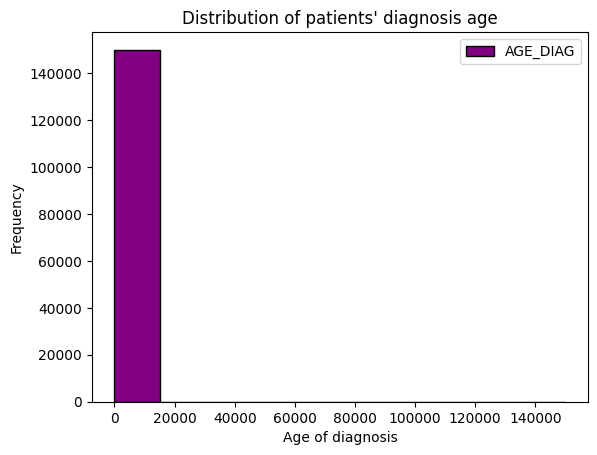

In [9]:
ax = patient_df.plot.hist(column=['AGE_DIAG'], color='purple', edgecolor='black')
ax.set_title('Distribution of patients\' diagnosis age') 
ax.set_xlabel('Age of diagnosis')
ax.set_ylabel('Frequency')

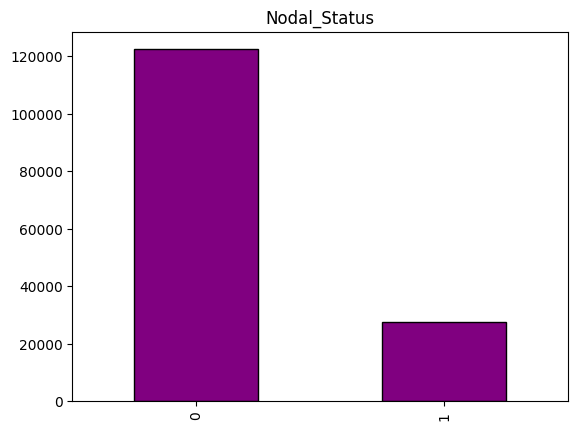

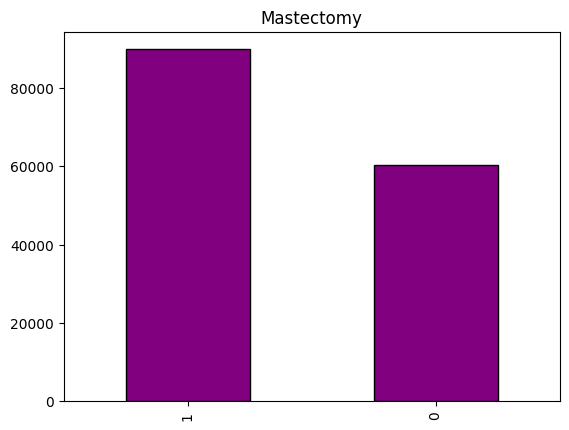

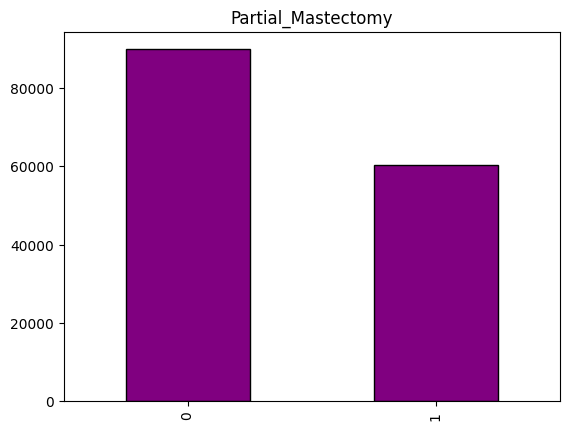

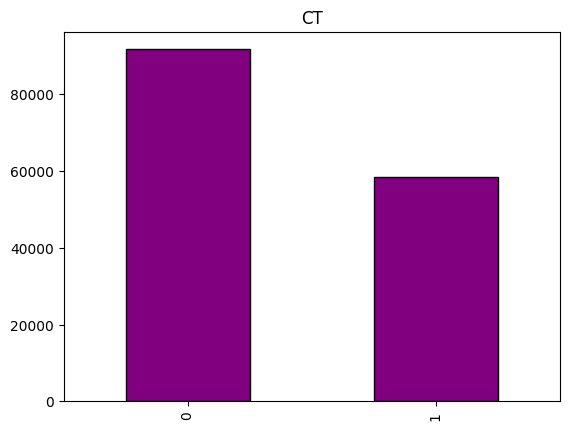

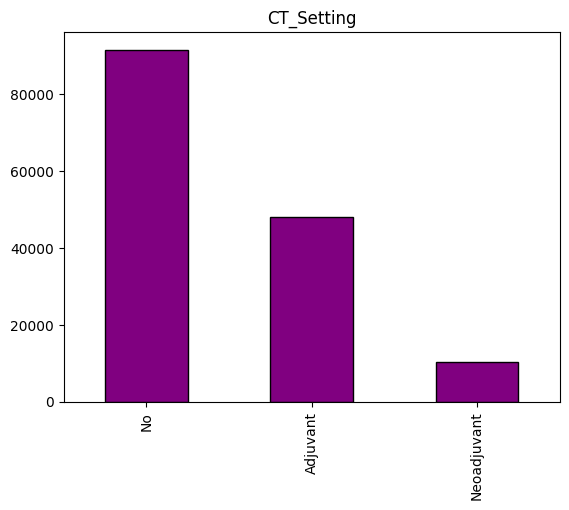

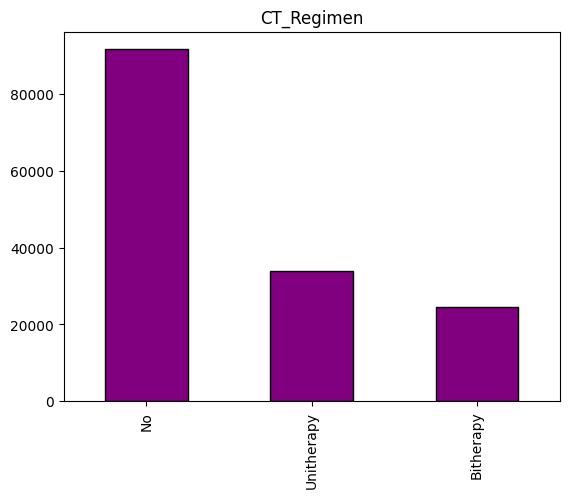

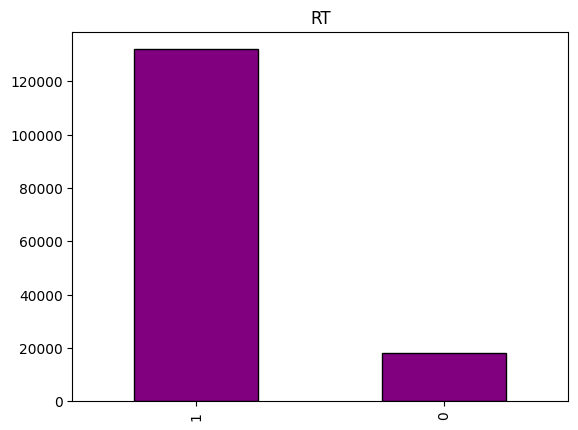

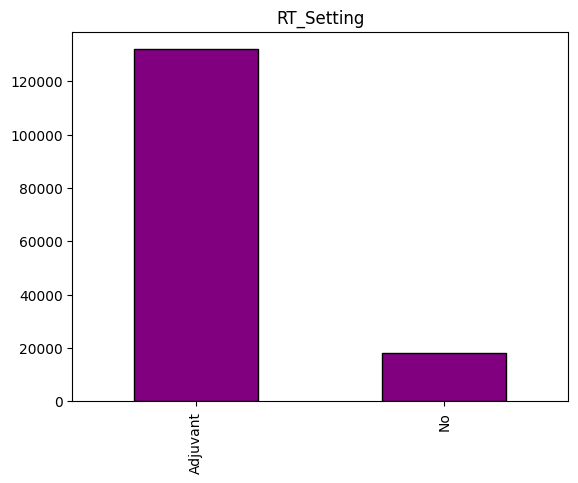

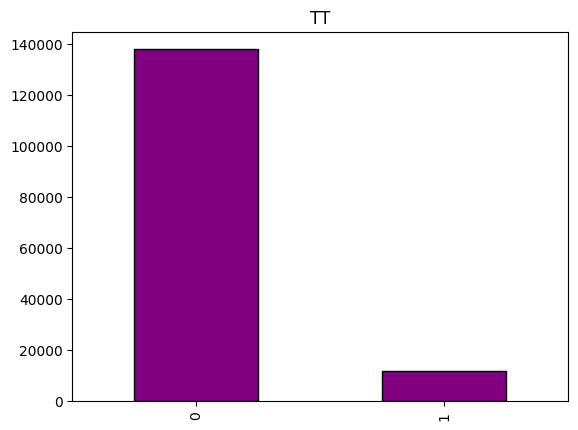

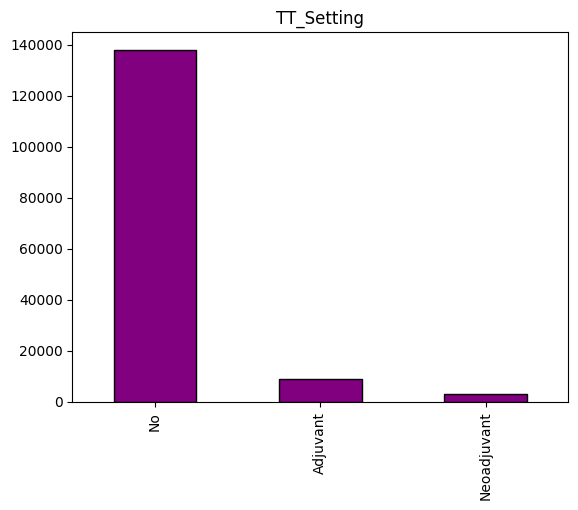

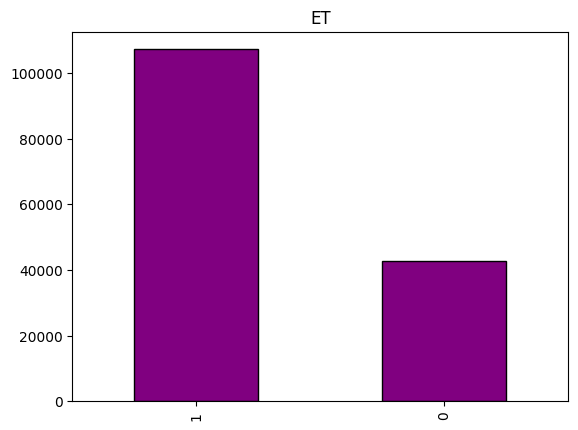

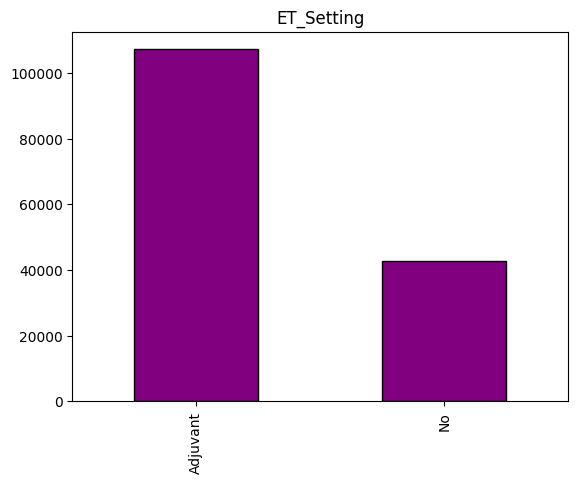

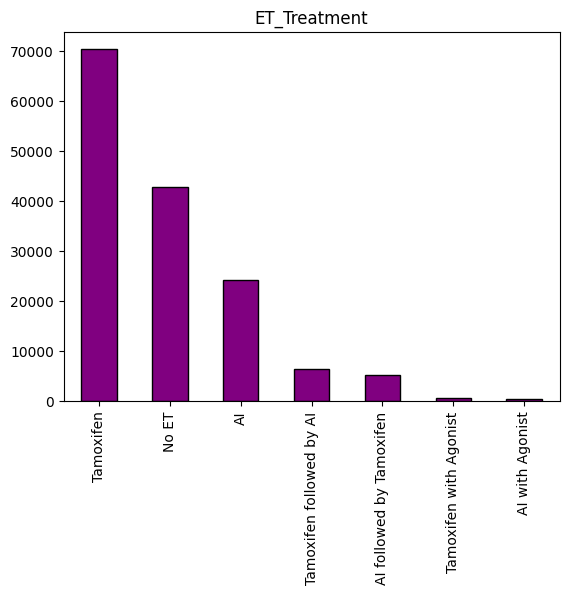

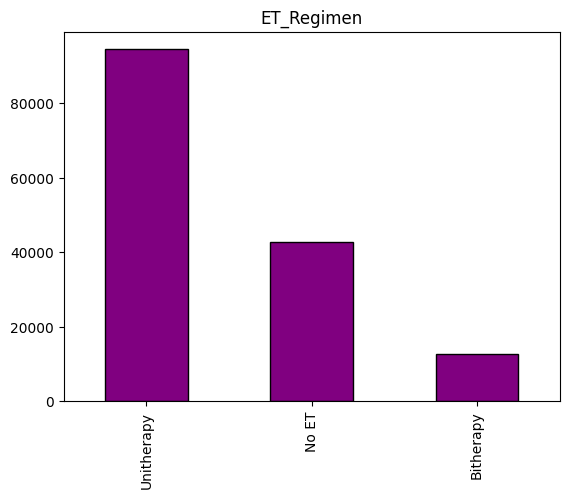

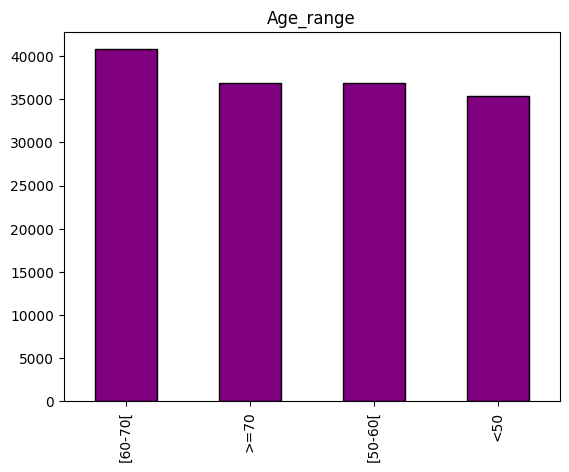

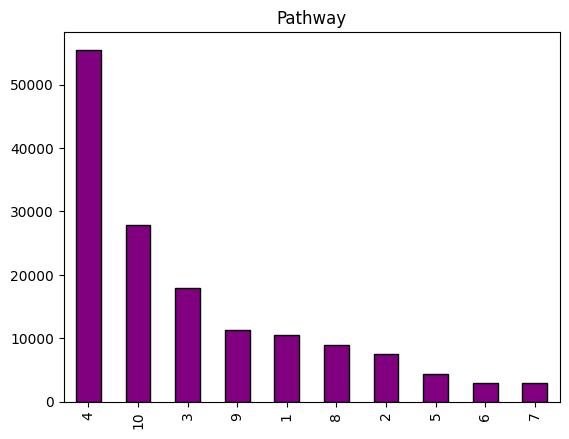

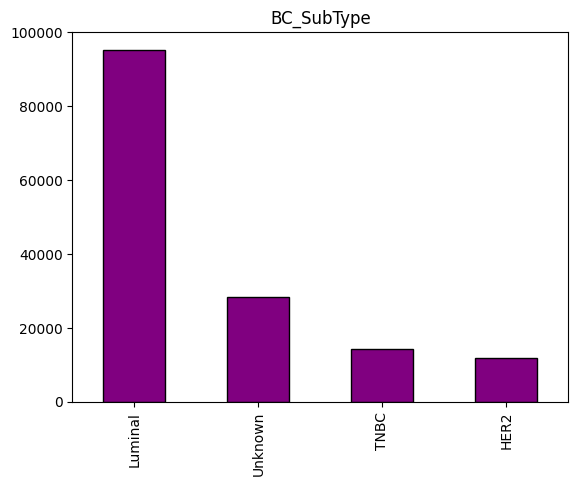

In [10]:
for col in cols:
    patient_df_dropped[col].value_counts().plot(kind="bar", color='purple', edgecolor='black').set_title(col)
    plt.show()

In [11]:
pathway = patient_df.groupby('Pathway')
pathway.first()

,Unnamed: 0,ID_PATIENT,AGE_DIAG,Nodal_Status,Mastectomy,Partial_Mastectomy,Surgery,CT,CT_Setting,CT_Regimen,RT,RT_Setting,TT,TT_Setting,ET,ET_Setting,ET_Treatment,ET_Regimen,Age_range,BC_SubType
Pathway,,,,,,,,,,,,,,,,,,,,
1,0,10127015029441953,94,0,1,0,1,0,No,No,0,No,0,No,0,No,No ET,No ET,>=70,Unknown
2,38,10132024124161858,89,0,1,0,1,0,No,No,0,No,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,Luminal
3,5,10128067936413950,93,0,0,1,1,0,No,No,1,Adjuvant,0,No,0,No,No ET,No ET,>=70,Unknown
4,1,10128002810515666,93,0,0,1,1,0,No,No,1,Adjuvant,0,No,1,Adjuvant,Tamoxifen,Unitherapy,>=70,Luminal
5,3105,10152035126875162,69,0,1,0,1,1,Neoadjuvant,Unitherapy,1,Adjuvant,0,No,1,Adjuvant,Tamoxifen followed by AI,Bitherapy,[60-70[,Luminal
6,161,10135069282728923,86,1,1,0,1,1,Neoadjuvant,Unitherapy,1,Adjuvant,0,No,0,No,No ET,No ET,>=70,TNBC
7,28,10131067074544578,90,0,0,1,1,1,Neoadjuvant,Unitherapy,1,Adjuvant,1,Neoadjuvant,1,Adjuvant,Tamoxifen followed by AI,Bitherapy,>=70,HER2
8,8,10129001187595067,92,0,1,0,1,1,Adjuvant,Unitherapy,1,Adjuvant,1,Adjuvant,1,Adjuvant,Tamoxifen,Unitherapy,>=70,HER2
9,13,10129062256203281,92,0,1,0,1,1,Adjuvant,Unitherapy,1,Adjuvant,0,No,0,No,No ET,No ET,>=70,TNBC


In [12]:
patient_df['Pathway'].value_counts().sort_index()

1     10521
2      7531
3     17996
4     55518
5      4426
6      2960
7      2930
8      9009
9     11303
10    27806
Name: Pathway, dtype: int64

In [13]:
patient_df['BC_SubType'].value_counts()

Luminal    95281
Unknown    28517
TNBC       14263
HER2       11939
Name: BC_SubType, dtype: int64

In [14]:
visits = pd.read_pickle("../data/Bdd.pkl")
visits

,BEN_IDT_ANO,DATE,COD_CCAM,COD_ICD10,COD_CIP,COD_UCD
0,10127015029441953,2022-01-08,QEFA019,None,None,None
1,10127015029441953,2022-01-08,None,C50,None,None
2,10128002810515666,2022-01-09,QEFA018,None,None,None
3,10128002810515666,2022-01-09,None,C50,None,None
4,10128002810515666,2022-02-01,None,Z5100,None,None
...,...,...,...,...,...,...
8779884,11295046241182206,2023-08-28,None,None,3400935940469,None
8779885,11295046241182206,2023-09-28,None,None,3400935940469,None
8779886,11295046241182206,2023-10-28,None,None,3400935940469,None
8779887,11295046241182206,2023-11-28,None,None,3400935940469,None


In [15]:
visits_cols = visits.columns

In [16]:
# tranforming date column into a date type

visits["DATE"] = pd.to_datetime(visits['DATE'], errors='coerce')

In [17]:
print("Number of non-missing values for each column :")
for col in visits_cols:
    print(f"{col} : {visits[col].count()}")

Number of non-missing values for each column :
BEN_IDT_ANO : 8779889
DATE : 8779889
COD_CCAM : 4125831
COD_ICD10 : 2612054
COD_CIP : 1329008
COD_UCD : 527715


In [18]:
code_columns = ['COD_CCAM', 'COD_CIP', 'COD_UCD']
for col in code_columns:
    print(visits[col].value_counts(sort=True))

ZZNL065    614414
YYYY047    422800
ZZLF900    388561
YYYY166    352720
YYYY152    279701
            ...  
YYYY492      3567
ZZNL042      3206
EDLF016      2392
YYYY136      2015
HPLB003      1878
Name: COD_CCAM, Length: 81, dtype: int64
3400936797598    24609
3400934303791    24576
3400933263867    24497
3400936136601    24169
3400933288303    24148
                 ...  
3400936690929      468
3400937575256      432
3400933943769      396
3400932850037      384
3400934125652      384
Name: COD_CIP, Length: 189, dtype: int64
9031083    39972
9031077    39885
9031114    39586
9220097    24304
9400037    23452
           ...  
9284393     1627
9343747     1619
9313172     1602
9306686     1565
9284335     1542
Name: COD_UCD, Length: 153, dtype: int64


In [19]:
most_common_tokens = {}

for col in code_columns:
    value_counts = visits[col].value_counts(sort=True)

    cumsum = value_counts.cumsum()
    total_count = value_counts.sum()
    cumulative_percentage = (cumsum / total_count) * 100
    
    top_70_mask = cumulative_percentage <= 70
    top_70_codes = value_counts[top_70_mask]
    
    print(f"\nNumber of codes in {col} in top 70%: {len(top_70_codes)}")
    print(f"These cover {top_70_codes.sum() / total_count * 100:.1f}% of all occurrences")
    
    top_70_list = [code for code in top_70_codes.index if pd.notna(code)]
    most_common_tokens[col] = top_70_list
    
    print(f"First 5 codes: {top_70_list[:5]}")


Number of codes in COD_CCAM in top 70%: 10
These cover 68.7% of all occurrences
First 5 codes: ['ZZNL065', 'YYYY047', 'ZZLF900', 'YYYY166', 'YYYY152']

Number of codes in COD_CIP in top 70%: 40
These cover 69.7% of all occurrences
First 5 codes: [3400936797598, 3400934303791, 3400933263867, 3400936136601, 3400933288303]

Number of codes in COD_UCD in top 70%: 71
These cover 69.8% of all occurrences
First 5 codes: ['9031083', '9031077', '9031114', '9220097', '9400037']


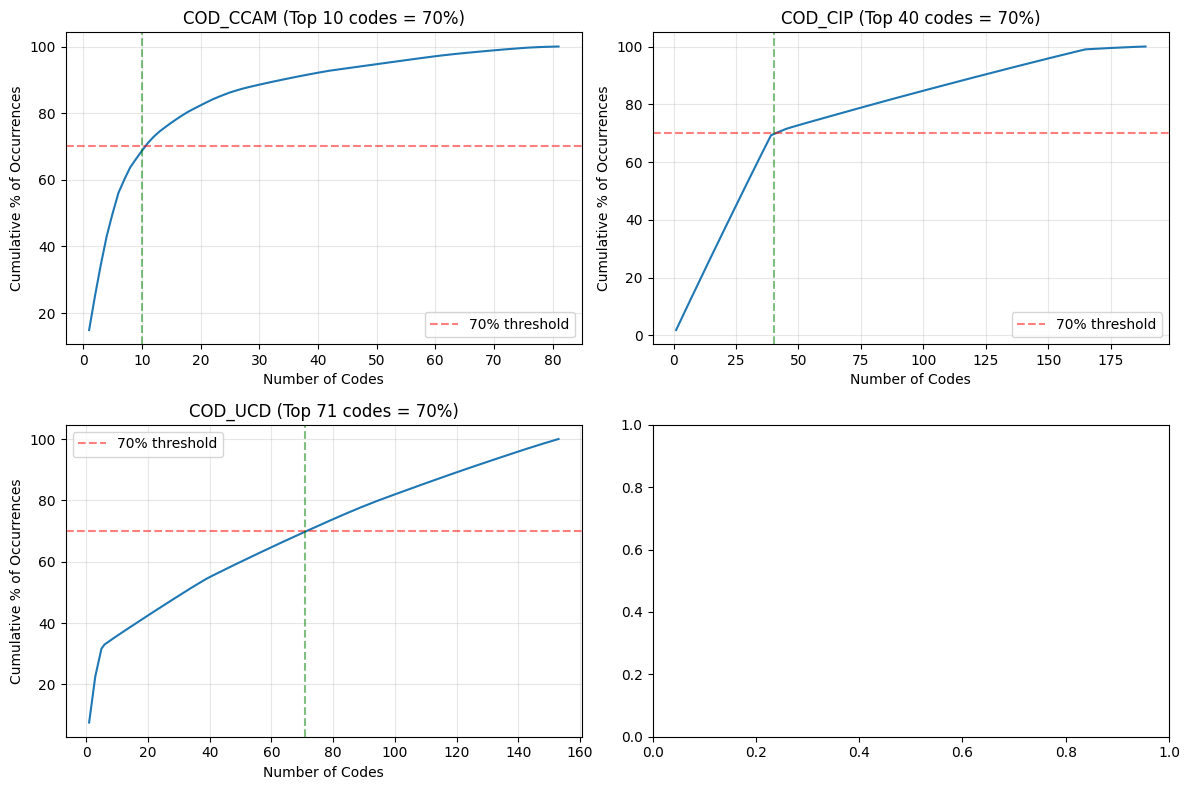

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, col in enumerate(code_columns):
    value_counts = visits[col].value_counts(dropna=True, sort=True)
    cumsum = value_counts.cumsum()
    total_count = value_counts.sum()
    cumulative_percentage = (cumsum / total_count) * 100
    
    axes[idx].plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage.values)
    axes[idx].axhline(y=70, color='r', linestyle='--', alpha=0.5, label='70% threshold')
    
    crossing_point = (cumulative_percentage <= 70).sum()
    axes[idx].axvline(x=crossing_point, color='g', linestyle='--', alpha=0.5)
    
    axes[idx].set_title(f'{col} (Top {crossing_point} codes = 70%)')
    axes[idx].set_xlabel('Number of Codes')
    axes[idx].set_ylabel('Cumulative % of Occurrences')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
visits_per_patient = visits.groupby('BEN_IDT_ANO')

In [22]:
grouped_sorted = visits.sort_values(['BEN_IDT_ANO', 'DATE']).groupby('BEN_IDT_ANO')

first_patient_id = list(grouped_sorted.groups.keys())[0]
sorted_visits = grouped_sorted.get_group(first_patient_id)

print(f"Patient {first_patient_id} visits sorted by date:\n")
print(sorted_visits[['DATE', 'COD_CCAM', 'COD_CIP', 'COD_UCD', 'COD_ICD10']].head())

Patient 10127015029441953 visits sorted by date:

        DATE COD_CCAM COD_CIP COD_UCD COD_ICD10
0 2022-01-08  QEFA019    None    None      None
1 2022-01-08     None    None    None       C50


In [23]:
# Create sequences of codes for each patient
patient_sequences = {}

for patient_id, group_df in visits_per_patient:
    if 'DATE' in group_df.columns:
        group_df = group_df.sort_values('DATE')
    
    # Create sequences for each code type
    patient_sequences[patient_id] = {
        'ccam_sequence': group_df['COD_CCAM'].dropna().tolist(),
        'icd10_sequence': group_df['COD_ICD10'].dropna().tolist(),
        'cip_sequence': group_df['COD_CIP'].dropna().tolist(),
        'ucd_sequence': group_df['COD_UCD'].dropna().tolist(),
        'num_visits': len(group_df),
        'date_range': (group_df['DATE'].min(), group_df['DATE'].max()) if 'DATE' in group_df.columns else None
    }

sequences_df = pd.DataFrame.from_dict(patient_sequences, orient='index')
print("Patient sequences DataFrame:")
sequences_df

Patient sequences DataFrame:


,ccam_sequence,icd10_sequence,cip_sequence,ucd_sequence,num_visits,date_range
10127015029441953,[QEFA019],[C50],[],[],2,"(2022-01-08 00:00:00, 2022-01-08 00:00:00)"
10128002810515666,"[QEFA018, YYYY166, YYYY166, YYYY166, YYYY166, ...","[C50, Z5100, Z5101, Z5101, Z5101, Z5101, Z5101...","[3400934317811, 3400934317811, 3400934317811, ...",[],63,"(2022-01-09 00:00:00, 2023-02-17 00:00:00)"
10128024250701935,"[QEFA001, YYYY048, YYYY048, YYYY048, YYYY048, ...",[C50],"[3400949410477, 3400949410477, 3400949410477, ...",[],39,"(2022-01-03 00:00:00, 2023-03-13 00:00:00)"
10128033549936740,"[QEFA018, ZZNL065, ZZNL065, ZZNL065, ZZNL065, ...","[C50, Z5100, Z5101, Z5101, Z5101, Z5101, Z5101...","[3400932059324, 3400932059324, 3400932059324, ...",[],83,"(2022-01-22 00:00:00, 2023-03-27 00:00:00)"
10128064000854625,"[QEFA015, YYYY048, YYYY048, YYYY048, YYYY048, ...",[C50],"[3400936797659, 3400936797659, 3400936797659, ...",[],38,"(2022-01-13 00:00:00, 2023-04-24 00:00:00)"
...,...,...,...,...,...,...
11293018005167785,"[ZZLF900, ZZLF900, ZZLF900, ZZLF900, ZZLF900, ...","[Z511, Z511, Z511, Z511, Z511, Z511, Z511, Z51...","[3400933288303, 3400933288303, 3400933288303, ...","[9306663, 9306663, 9306663, 9306663, 9340950, ...",97,"(2022-08-16 00:00:00, 2023-06-14 00:00:00)"
11293022113785146,"[QEFA008, ZZNL065, ZZNL065, ZZNL065, ZZNL065, ...","[C50, Z5100, Z5101, Z5101, Z5101, Z5101, Z5101...","[3400930108345, 3400930108345, 3400930108345, ...",[],84,"(2022-05-17 00:00:00, 2023-06-25 00:00:00)"
11294021242399597,"[QEFA017, ZZLF900, ZZLF900, ZZLF900, ZZLF900, ...","[C50, Z511, Z511, Z511, Z511, Z511, Z511, Z511]",[],"[9192136, 9192136, 9192136, 9192136, 9327926, ...",47,"(2022-11-12 00:00:00, 2023-07-24 00:00:00)"
11294080294882827,"[QEFA007, ZZLF900, ZZLF900, ZZLF900, ZZLF900, ...","[C50, Z511, Z511, Z511, Z511, Z511, Z511, Z511...","[3400939986838, 3400939986838, 3400939986838, ...","[9285346, 9285346, 9285346, 9341004, 9341004, ...",112,"(2022-06-28 00:00:00, 2024-01-04 00:00:00)"


In [24]:
# Analyze time between visits (if DATE available)
time_between_visits = {}

for patient_id, group_df in visits_per_patient:
    if len(group_df) > 1 and 'DATE' in group_df.columns:
        group_df = group_df.sort_values('DATE')
        dates = pd.to_datetime(group_df['DATE'])
        time_diffs = (dates.diff().dt.days).dropna()
        time_between_visits[patient_id] = {
            'mean_days': time_diffs.mean(),
            'std_days': time_diffs.std(),
            'min_days': time_diffs.min(),
            'max_days': time_diffs.max()
        }

time_between_df = pd.DataFrame.from_dict(time_between_visits, orient='index')
print("Time between visits (patients with >1 visit):")
print(time_between_df.describe())

Time between visits (patients with >1 visit):
           mean_days       std_days  min_days       max_days
count  150000.000000  140272.000000  150000.0  150000.000000
mean        7.065389       9.429399       0.0      30.513660
std         5.865898       3.450829       0.0      13.147462
min         0.000000       0.000000       0.0       0.000000
25%         3.763158       7.975917       0.0      31.000000
50%         5.569444      10.641350       0.0      31.000000
75%        10.241379      12.022560       0.0      32.000000
max        28.230769      14.424700       0.0      62.000000


# TEST Badie

In [25]:
visits["DATE"] = pd.to_datetime(visits['DATE'], errors='coerce')

# Colonnes de codes
code_columns = ['COD_CCAM', 'COD_ICD10', 'COD_CIP', 'COD_UCD']

# 1. Créer une période d'étude standardisée
# On commence au début de la première semaine complète
start_date = visits['DATE'].min()
# Normaliser au lundi de la semaine
start_date = start_date - pd.Timedelta(days=start_date.weekday())

# Définir la fin (peut-être aujourd'hui ou date max)
end_date = visits['DATE'].max()
# Ou fixer une durée standard (ex: 2 ans = 104 semaines)
# end_date = start_date + pd.Timedelta(weeks=104)

# 2. Créer les bins de semaines
n_weeks = ((end_date - start_date).days // 7) + 1
print(f"Période d'étude: {n_weeks} semaines ({start_date.date()} à {end_date.date()})")

# 3. Créer la colonne de semaine pour chaque visite
visits['week'] = ((visits['DATE'] - start_date).dt.days // 7)
visits['week'] = visits['week'].clip(lower=0)  # Éviter les valeurs négatives

# 4. Initialiser la matrice
patient_ids = visits['BEN_IDT_ANO'].unique()
n_patients = len(patient_ids)

print(f"Nombre de patients: {n_patients}")
print(f"Taille de la matrice: {n_patients} × {n_weeks}")

# Créer une matrice vide (DataFrame) avec index=patients, colonnes=semaines
weekly_matrix = pd.DataFrame(
    '',
    index=patient_ids,
    columns=range(n_weeks),
    dtype=str
)

# 5. Remplir la matrice
# Grouper par patient et semaine
grouped = visits.groupby(['BEN_IDT_ANO', 'week'])

for (patient_id, week), group in grouped:
    if week < n_weeks:  # S'assurer que la semaine est dans la plage
        # Collecter tous les codes non-nuls de cette semaine
        all_codes = []
        
        for col in code_columns:
            codes = group[col].dropna().astype(str).unique()
            if len(codes) > 0:
                # Formater: "CCAM:C1,C2" ou "ICD10:I1,I2"
                code_type = col.replace('COD_', '')
                all_codes.append(f"{code_type}:{','.join(sorted(codes))}")
        
        # Concaténer tous les codes de la semaine
        if all_codes:
            weekly_matrix.loc[patient_id, week] = " | ".join(all_codes)

print("\nMatrice créée!")
print(f"Dimensions: {weekly_matrix.shape}")
print(f"Densité (cases non vides): {(weekly_matrix != '').sum().sum() / (n_patients * n_weeks) * 100:.2f}%")

# 6. Afficher un exemple
print("\n=== Exemple pour un patient (premières 10 semaines) ===")
sample_patient = patient_ids[0]
print(f"Patient: {sample_patient}")
for week in range(min(10, n_weeks)):
    content = weekly_matrix.loc[sample_patient, week]
    if content:
        print(f"Week {week}: {content}")

# 7. Sauvegarder
weekly_matrix.to_csv("../data/weekly_patient_matrix.csv")
print(f"\nMatrice sauvegardée dans: ../data/weekly_patient_matrix.csv")

Période d'étude: 142 semaines (2021-12-27 à 2024-09-13)
Nombre de patients: 150000
Taille de la matrice: 150000 × 142

Matrice créée!
Dimensions: (150000, 142)
Densité (cases non vides): 14.56%

=== Exemple pour un patient (premières 10 semaines) ===
Patient: 10127015029441953
Week 1: CCAM:QEFA019 | ICD10:C50

Matrice sauvegardée dans: ../data/weekly_patient_matrix.csv


C:\Users\nessa\AppData\Local\Temp\ipykernel_18052\3613288826.py:2: DtypeWarning: Columns (95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  weekly_matrix = pd.read_csv("../data/weekly_patient_matrix.csv", index_col=0)


Matrice chargée: (150000, 142)
=== Distribution du nombre de semaines avec visites ===
count    150000.0
mean        142.0
std           0.0
min         142.0
25%         142.0
50%         142.0
75%         142.0
max         142.0
dtype: float64


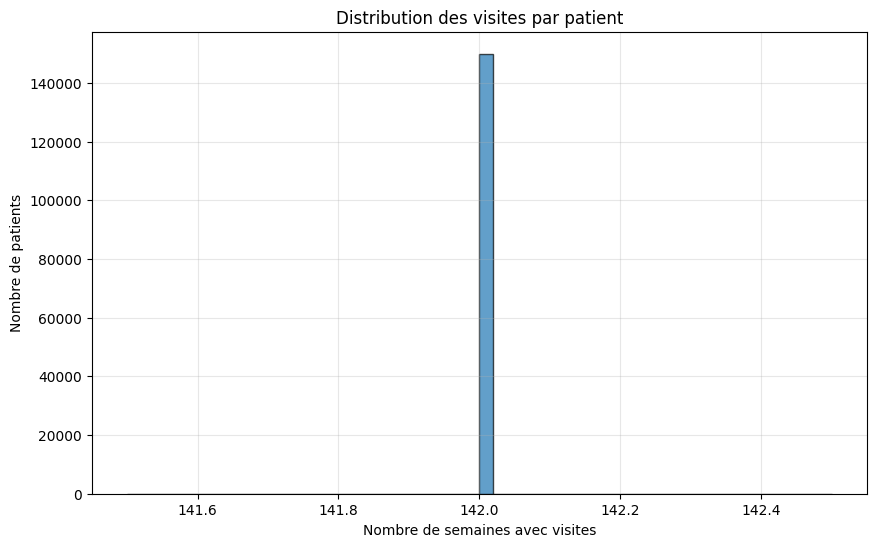


Patients fréquents (> médiane = 142.0 semaines): 0
Patients rares (≤ médiane = 142.0 semaines): 150000

Patients avec au moins une visite: 150000 (100.0%)

=== Top 10 patients les plus actifs ===
Patient 10127015029441953: 142 semaines avec visites (100.0% du temps)
Patient 10128002810515666: 142 semaines avec visites (100.0% du temps)
Patient 10128024250701935: 142 semaines avec visites (100.0% du temps)
Patient 10128033549936740: 142 semaines avec visites (100.0% du temps)
Patient 10128064000854625: 142 semaines avec visites (100.0% du temps)
Patient 10128067936413950: 142 semaines avec visites (100.0% du temps)
Patient 10128073248792761: 142 semaines avec visites (100.0% du temps)
Patient 10128076171540983: 142 semaines avec visites (100.0% du temps)
Patient 10129001187595067: 142 semaines avec visites (100.0% du temps)
Patient 10129007086669829: 142 semaines avec visites (100.0% du temps)


In [4]:
# 1. Charger la matrice que tu as créée précédemment
weekly_matrix = pd.read_csv("../data/weekly_patient_matrix.csv", index_col=0)
print(f"Matrice chargée: {weekly_matrix.shape}")

# Convertir l'index en string (si ce n'est pas déjà fait)
weekly_matrix.index = weekly_matrix.index.astype(str)

# 2. Calculer les statistiques par patient
patient_stats = (weekly_matrix != '').sum(axis=1)
print("=== Distribution du nombre de semaines avec visites ===")
print(patient_stats.describe())

# 3. Histogramme
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(patient_stats, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Nombre de semaines avec visites')
plt.ylabel('Nombre de patients')
plt.title('Distribution des visites par patient')
plt.grid(True, alpha=0.3)
plt.savefig('../data/visits_per_patient_distribution.png')
plt.show()

# 4. Patients avec visites fréquentes vs rares
median_visits = patient_stats.median()
frequent_patients = patient_stats[patient_stats > median_visits].index
rare_patients = patient_stats[patient_stats <= median_visits].index

print(f"\nPatients fréquents (> médiane = {median_visits} semaines): {len(frequent_patients)}")
print(f"Patients rares (≤ médiane = {median_visits} semaines): {len(rare_patients)}")

# 5. Pourcentage de patients avec au moins une visite
patients_with_visits = (patient_stats > 0).sum()
print(f"\nPatients avec au moins une visite: {patients_with_visits} ({patients_with_visits/len(patient_stats)*100:.1f}%)")

# 6. Top 10 patients les plus actifs
print("\n=== Top 10 patients les plus actifs ===")
top_patients = patient_stats.nlargest(10)
for pid, weeks in top_patients.items():
    print(f"Patient {pid}: {weeks} semaines avec visites ({weeks/142*100:.1f}% du temps)")

In [5]:
# Si certains patients ont 0 visite :
zero_visit_patients = patient_stats[patient_stats == 0]
print(f"\nPatients sans aucune visite: {len(zero_visit_patients)}")

# Si distribution très asymétrique :
# Peut-être filtrer les patients avec trop peu/beaucoup de données
good_coverage = patient_stats[(patient_stats >= 5) & (patient_stats <= 50)]
print(f"\nPatients avec couverture 'idéale' (5-50 semaines): {len(good_coverage)}")



Patients sans aucune visite: 0

Patients avec couverture 'idéale' (5-50 semaines): 0


In [6]:
print("=== ANALYSE DÉTAILLÉE ===")
print(f"Nombre total de patients: {len(patient_stats)}")

# Statistiques détaillées
print("\n--- Statistiques de patient_stats ---")
print(f"Min: {patient_stats.min()}")
print(f"Max: {patient_stats.max()}")
print(f"Moyenne: {patient_stats.mean():.2f}")
print(f"Médiane: {patient_stats.median()}")
print(f"Std: {patient_stats.std():.2f}")

# Distribution complète
print("\n--- Distribution complète ---")
for threshold in [1, 5, 10, 20, 30, 50, 100, 142]:
    count = (patient_stats >= threshold).sum()
    pct = count / len(patient_stats) * 100
    print(f"≥ {threshold:3} semaines: {count:6} patients ({pct:5.1f}%)")

# Vérifier les premières valeurs
print("\n--- Premières valeurs de patient_stats ---")
print(patient_stats.head(20))

# Vérifier la taille de la matrice
print("\n--- Vérification de la matrice ---")
print(f"Shape: {weekly_matrix.shape}")
print(f"Colonnes: {list(weekly_matrix.columns[:10])}...")
print(f"Index (patients): {list(weekly_matrix.index[:5])}")

# Vérifier un patient spécifique
sample_patient = weekly_matrix.index[0]
print(f"\n--- Vérification du patient {sample_patient} ---")
sample_data = weekly_matrix.loc[sample_patient]
print(f"Nombre de cellules non vides: {(sample_data != '').sum()}")
print(f"Valeurs non vides (5 premières):")
non_empty = sample_data[sample_data != ''].head(5)
for week, value in non_empty.items():
    print(f"  Semaine {week}: {value}")

# Vérifier le type des données
print("\n--- Types de données ---")
print(f"Type de patient_stats: {type(patient_stats)}")
print(f"Type des valeurs: {weekly_matrix.iloc[0,0] if pd.notna(weekly_matrix.iloc[0,0]) else 'NaN'}")

=== ANALYSE DÉTAILLÉE ===
Nombre total de patients: 150000

--- Statistiques de patient_stats ---
Min: 142
Max: 142
Moyenne: 142.00
Médiane: 142.0
Std: 0.00

--- Distribution complète ---
≥   1 semaines: 150000 patients (100.0%)
≥   5 semaines: 150000 patients (100.0%)
≥  10 semaines: 150000 patients (100.0%)
≥  20 semaines: 150000 patients (100.0%)
≥  30 semaines: 150000 patients (100.0%)
≥  50 semaines: 150000 patients (100.0%)
≥ 100 semaines: 150000 patients (100.0%)
≥ 142 semaines: 150000 patients (100.0%)

--- Premières valeurs de patient_stats ---
10127015029441953    142
10128002810515666    142
10128024250701935    142
10128033549936740    142
10128064000854625    142
10128067936413950    142
10128073248792761    142
10128076171540983    142
10129001187595067    142
10129007086669829    142
10129049140319058    142
10129050270699332    142
10129061346008099    142
10129062256203281    142
10130001410026282    142
10130008398516922    142
10130021406949043    142
101300245038725

In [7]:
# Vérification rapide de la matrice
print("=== VÉRIFICATION MATRICE ===")

# Compter les cellules vides/non vides
empty_cells = (weekly_matrix == '').sum().sum()
non_empty_cells = (weekly_matrix != '').sum().sum()
total_cells = weekly_matrix.shape[0] * weekly_matrix.shape[1]

print(f"Cellules totales: {total_cells:,}")
print(f"Cellules non vides: {non_empty_cells:,} ({non_empty_cells/total_cells*100:.2f}%)")
print(f"Cellules vides: {empty_cells:,} ({empty_cells/total_cells*100:.2f}%)")

# Vérifier par semaine
weekly_non_empty = (weekly_matrix != '').sum(axis=0)
print(f"\nSemaine avec le plus d'activité: Semaine {weekly_non_empty.idxmax()} ({weekly_non_empty.max()} patients)")
print(f"Semaine avec le moins d'activité: Semaine {weekly_non_empty.idxmin()} ({weekly_non_empty.min()} patients)")

# Vérifier par patient
print(f"\nPatient avec le plus d'activité: {patient_stats.idxmax()} ({patient_stats.max()} semaines)")
print(f"Patient avec le moins d'activité: {patient_stats.idxmin()} ({patient_stats.min()} semaines)")

=== VÉRIFICATION MATRICE ===
Cellules totales: 21,300,000
Cellules non vides: 21,300,000 (100.00%)
Cellules vides: 0 (0.00%)

Semaine avec le plus d'activité: Semaine 0 (150000 patients)
Semaine avec le moins d'activité: Semaine 0 (150000 patients)

Patient avec le plus d'activité: 10127015029441953 (142 semaines)
Patient avec le moins d'activité: 10127015029441953 (142 semaines)


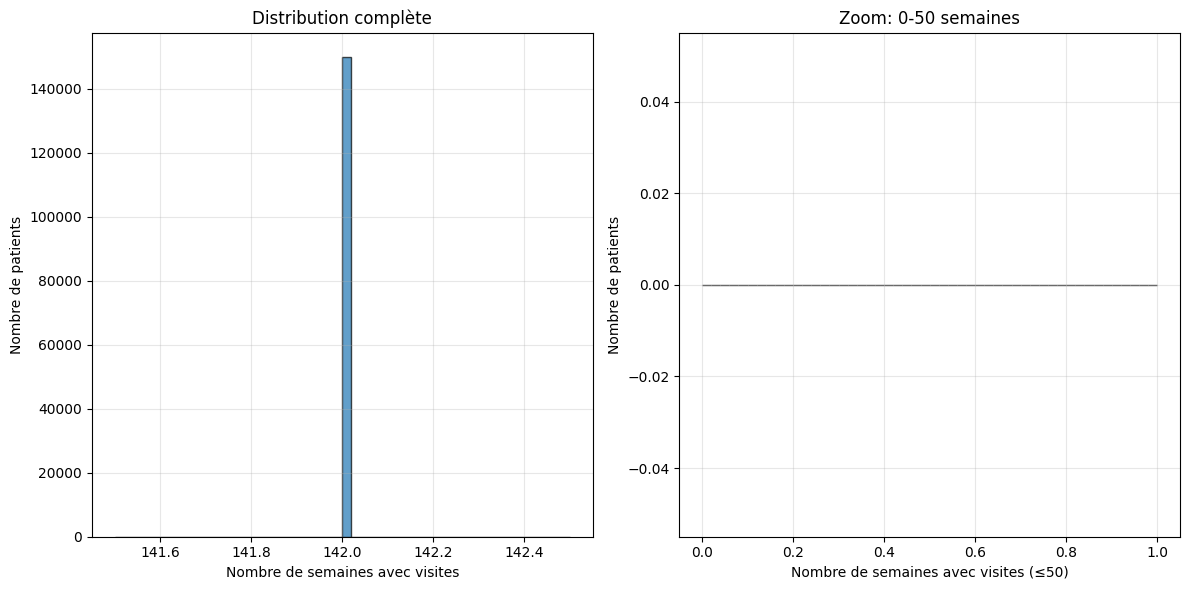

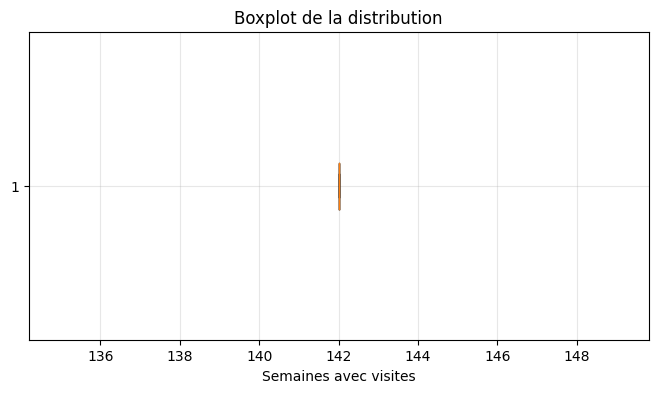

In [8]:
# Histogramme avec plus de détails
plt.figure(figsize=(12, 6))

# Histogramme principal
plt.subplot(1, 2, 1)
plt.hist(patient_stats, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Nombre de semaines avec visites')
plt.ylabel('Nombre de patients')
plt.title('Distribution complète')
plt.grid(True, alpha=0.3)

# Zoom sur les petites valeurs
plt.subplot(1, 2, 2)
plt.hist(patient_stats[patient_stats <= 50], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Nombre de semaines avec visites (≤50)')
plt.ylabel('Nombre de patients')
plt.title('Zoom: 0-50 semaines')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/detailed_distribution.png')
plt.show()

# Boxplot pour voir les outliers
plt.figure(figsize=(8, 4))
plt.boxplot(patient_stats, vert=False)
plt.xlabel('Semaines avec visites')
plt.title('Boxplot de la distribution')
plt.grid(True, alpha=0.3)
plt.show()

# mark


In [13]:
import pandas as pd
import numpy as np

# Charger df_char
df = pd.read_csv('../data/df_char (1).csv')

# 1. Distribution par sous-type
subtype_dist = df['BC_SubType'].value_counts()

# 2. Pathways utilisés
pathway_counts = df['Pathway'].value_counts()

# 3. Matrice des traitements binaires
traitements = ['CT', 'RT', 'TT', 'ET']
for t in traitements:
    df[f'{t}_binary'] = df[t].apply(lambda x: 1 if x == 1 else 0)

print("="*60)
print("ANALYSE DES DONNÉES DE CANCER DU SEIN")
print("="*60)

print("\n1. RÉPARTITION PAR SOUS-TYPE DE CANCER:")
print("-"*40)
print(subtype_dist)
print(f"\nTotal patients: {len(df)}")

print("\n2. PATHWAYS (CHEMINS DE TRAITEMENT):")
print("-"*40)
print(pathway_counts.sort_index())

print("\n3. PRÉVALENCE DES TRAITEMENTS:")
print("-"*40)
for t in traitements:
    count = df[t].sum()
    percentage = (count / len(df)) * 100
    print(f"{t}: {count} patients ({percentage:.1f}%)")

print("\n4. ASSOCIATIONS ENTRE TRAITEMENTS (CO-OCCURRENCES):")
print("-"*40)
# Calculer les co-occurrences manuellement
cooccurrence_matrix = pd.DataFrame(index=traitements, columns=traitements)

for t1 in traitements:
    for t2 in traitements:
        if t1 == t2:
            cooccurrence_matrix.loc[t1, t2] = df[t1].sum()
        else:
            count_both = ((df[t1] == 1) & (df[t2] == 1)).sum()
            cooccurrence_matrix.loc[t1, t2] = count_both

print("Nombre de patients recevant les deux traitements:")
print(cooccurrence_matrix.astype(int))

print("\n5. TAUX DE CO-OCCURRENCE (%):")
print("-"*40)
cooccurrence_percent = pd.DataFrame(index=traitements, columns=traitements)
for t1 in traitements:
    for t2 in traitements:
        if t1 == t2:
            cooccurrence_percent.loc[t1, t2] = 100.0
        else:
            count_t1 = df[t1].sum()
            if count_t1 > 0:
                count_both = ((df[t1] == 1) & (df[t2] == 1)).sum()
                percentage = (count_both / count_t1) * 100
                cooccurrence_percent.loc[t1, t2] = percentage
            else:
                cooccurrence_percent.loc[t1, t2] = 0.0

print("Pourcentage des patients avec traitement X qui ont aussi traitement Y:")
print(cooccurrence_percent.round(1))

print("\n6. ÂGE MOYEN AU DIAGNOSTIC PAR SOUS-TYPE:")
print("-"*40)
age_stats = df.groupby('BC_SubType')['AGE_DIAG'].agg(['mean', 'std', 'min', 'max', 'count'])
print(age_stats.round(1))

print("\n7. CROISEMENT PATHWAY × SOUS-TYPE:")
print("-"*40)
cross_tab = pd.crosstab(df['Pathway'], df['BC_SubType'])
print(cross_tab)

print("\n8. STATUT NODAL PAR SOUS-TYPE:")
print("-"*40)
nodal_by_subtype = df.groupby('BC_SubType')['Nodal_Status'].agg(['mean', 'sum', 'count'])
nodal_by_subtype['percentage_positive'] = (nodal_by_subtype['sum'] / nodal_by_subtype['count']) * 100
print(nodal_by_subtype[['count', 'sum', 'percentage_positive']].round(1))

ANALYSE DES DONNÉES DE CANCER DU SEIN

1. RÉPARTITION PAR SOUS-TYPE DE CANCER:
----------------------------------------
Luminal    95281
Unknown    28517
TNBC       14263
HER2       11939
Name: BC_SubType, dtype: int64

Total patients: 150000

2. PATHWAYS (CHEMINS DE TRAITEMENT):
----------------------------------------
1     10521
2      7531
3     17996
4     55518
5      4426
6      2960
7      2930
8      9009
9     11303
10    27806
Name: Pathway, dtype: int64

3. PRÉVALENCE DES TRAITEMENTS:
----------------------------------------
CT: 58434 patients (39.0%)
RT: 131948 patients (88.0%)
TT: 11939 patients (8.0%)
ET: 107220 patients (71.5%)

4. ASSOCIATIONS ENTRE TRAITEMENTS (CO-OCCURRENCES):
----------------------------------------
Nombre de patients recevant les deux traitements:
       CT      RT     TT      ET
CT  58434   58434  11939   44171
RT  58434  131948  11939   99689
TT  11939   11939  11939   11939
ET  44171   99689  11939  107220

5. TAUX DE CO-OCCURRENCE (%):
--------

In [14]:
pip install mlxtend


INFO: pip is looking at multiple versions of mlxtend to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 23.2 MB/s  0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 8.9/8.9 MB 45.9 MB/s  0:00:00

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.2.2

   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ----------------------------------

In [15]:
# 9. Analyse des combinaisons de traitements (sans mlxtend)
print("\n9. COMBINAISONS DE TRAITEMENTS LES PLUS FRÉQUENTES:")
print("-"*40)

# Créer une chaîne de traitements pour chaque patient
def get_treatment_string(row):
    treatments = []
    if row['CT'] == 1: treatments.append('CT')
    if row['RT'] == 1: treatments.append('RT')
    if row['TT'] == 1: treatments.append('TT')
    if row['ET'] == 1: treatments.append('ET')
    return '+'.join(treatments) if treatments else 'Aucun'

df['treatment_combo'] = df.apply(get_treatment_string, axis=1)

# Compter les combinaisons
combo_counts = df['treatment_combo'].value_counts()
print("Top 10 combinaisons de traitements:")
for combo, count in combo_counts.head(10).items():
    percentage = (count / len(df)) * 100
    print(f"  {combo}: {count} patients ({percentage:.1f}%)")

print("\n10. DURÉE DE TRAITEMENT (estimation):")
print("-"*40)
# Note: Ceci est une estimation basée sur les données disponibles
print("Pour une analyse temporelle précise, il faut les fichiers avec dates.")
print("Fichiers nécessaires: icd10_sequence.csv, ccam_sequence.csv, etc.")


9. COMBINAISONS DE TRAITEMENTS LES PLUS FRÉQUENTES:
----------------------------------------
Top 10 combinaisons de traitements:
  RT+ET: 55518 patients (37.0%)
  CT+RT+ET: 32232 patients (21.5%)
  RT: 17996 patients (12.0%)
  CT+RT: 14263 patients (9.5%)
  CT+RT+TT+ET: 11939 patients (8.0%)
  Aucun: 10521 patients (7.0%)
  ET: 7531 patients (5.0%)

10. DURÉE DE TRAITEMENT (estimation):
----------------------------------------
Pour une analyse temporelle précise, il faut les fichiers avec dates.
Fichiers nécessaires: icd10_sequence.csv, ccam_sequence.csv, etc.


In [18]:
import os

# Créer le dossier output s'il n'existe pas
output_dir = '../output/'
os.makedirs(output_dir, exist_ok=True)

print("Chargement des données...")
try:
    df_dates = pd.read_pickle('../data/BDD.pkl')
    print("Fichier BDD.pkl chargé avec succès!")
except:
    df_dates = pd.read_csv('../data/BDD.csv', sep=';')

# Afficher les premières lignes
print("\nAperçu des données temporelles:")
print(df_dates.head())
print(f"\nNombre total de lignes: {len(df_dates):,}")
print(f"Nombre de patients uniques: {df_dates['BEN_IDT_ANO'].nunique():,}")

# Renommer les colonnes
df_dates = df_dates.rename(columns={
    'BEN_IDT_ANO': 'ID_PATIENT',
    'DATE': 'DATE_VISITE',
    'COD_CCAM': 'CCAM',
    'COD_ICD10': 'ICD10',
    'COD_CIP': 'CIP',
    'COD_UCD': 'UCD'
})

# Convertir la date
df_dates['DATE_VISITE'] = pd.to_datetime(df_dates['DATE_VISITE'], errors='coerce')

# Calculer la semaine
df_dates['ANNEE'] = df_dates['DATE_VISITE'].dt.isocalendar().year
df_dates['SEMAINE'] = df_dates['DATE_VISITE'].dt.isocalendar().week
df_dates['ANNEE_SEMAINE'] = df_dates['ANNEE'].astype(str) + '-S' + df_dates['SEMAINE'].astype(str).str.zfill(2)

# Créer colonne combinée
def combiner_codes(row):
    codes = []
    if pd.notna(row['ICD10']):
        codes.append(f"ICD10:{row['ICD10']}")
    if pd.notna(row['CCAM']):
        codes.append(f"CCAM:{row['CCAM']}")
    if pd.notna(row['CIP']):
        codes.append(f"CIP:{row['CIP']}")
    if pd.notna(row['UCD']):
        codes.append(f"UCD:{row['UCD']}")
    return codes

df_dates['CODES_COMBINES'] = df_dates.apply(combiner_codes, axis=1)

# Grouper par patient et semaine
print("\nRegroupement par patient et semaine...")
df_grouped = df_dates.groupby(['ID_PATIENT', 'ANNEE_SEMAINE'])['CODES_COMBINES'].apply(
    lambda x: [item for sublist in x for item in sublist]
).reset_index()

# Créer la matrice pivot
print("Création de la matrice patient × semaine...")
matrice_pivot = df_grouped.pivot_table(
    index='ID_PATIENT',
    columns='ANNEE_SEMAINE',
    values='CODES_COMBINES',
    aggfunc=lambda x: x.iloc[0] if len(x) > 0 else []
)

# Remplir les NaN
matrice_pivot = matrice_pivot.applymap(lambda x: x if isinstance(x, list) else [])

# Trier les colonnes
matrice_pivot = matrice_pivot.reindex(sorted(matrice_pivot.columns), axis=1)

# Statistiques
print("\n" + "="*60)
print("STATISTIQUES DE LA MATRICE PATIENT × SEMAINE")
print("="*60)
print(f"Nombre de patients: {len(matrice_pivot):,}")
print(f"Nombre de semaines (colonnes): {len(matrice_pivot.columns)}")
print(f"Plage temporelle: {matrice_pivot.columns[0]} à {matrice_pivot.columns[-1]}")

# Densité
total_cells = len(matrice_pivot) * len(matrice_pivot.columns)
non_empty_cells = (matrice_pivot.applymap(len) > 0).sum().sum()
densite = (non_empty_cells / total_cells) * 100
print(f"Densité de la matrice: {densite:.2f}%")

# Exporter (version simplifiée pour éviter erreur mémoire)
print("\nExportation des résultats (version simplifiée)...")

# 1. Exporter sous forme parquet (plus efficace)
try:
    # Convertir en DataFrame avec listes comme strings
    matrice_export = matrice_pivot.copy()
    
    # Méthode 1: Exporter en parquet (recommandé pour grandes matrices)
    matrice_export.reset_index().to_parquet(f'{output_dir}matrice_patient_semaine.parquet')
    print(f"✓ Matrice exportée en parquet: {output_dir}matrice_patient_semaine.parquet")
    
    # Méthode 2: Exporter un échantillon en CSV
    echantillon = matrice_pivot.head(1000)  # 1000 premiers patients
    echantillon.reset_index().to_csv(f'{output_dir}matrice_echantillon.csv', index=False)
    print(f"✓ Échantillon exporté en CSV: {output_dir}matrice_echantillon.csv (1000 patients)")
    
except Exception as e:
    print(f"Erreur avec parquet: {e}")
    print("Tentative alternative...")
    
    # Alternative: Exporter en JSON
    matrice_dict = matrice_pivot.to_dict(orient='index')
    import json
    with open(f'{output_dir}matrice_patient_semaine.json', 'w') as f:
        json.dump(matrice_dict, f)
    print(f"✓ Matrice exportée en JSON: {output_dir}matrice_patient_semaine.json")

# 2. Calculer et exporter les métriques
print("\nCalcul des métriques...")

# Métriques par patient
visites_par_patient = df_grouped.groupby('ID_PATIENT').size()
semaines_actives = (matrice_pivot.applymap(len) > 0).sum(axis=1)
premiere_visite = df_dates.groupby('ID_PATIENT')['DATE_VISITE'].min()
derniere_visite = df_dates.groupby('ID_PATIENT')['DATE_VISITE'].max()
duree_jours = (derniere_visite - premiere_visite).dt.days

df_metriques = pd.DataFrame({
    'NB_VISITES': visites_par_patient,
    'NB_SEMAINES_ACTIVES': semaines_actives,
    'PREMIERE_VISITE': premiere_visite,
    'DERNIERE_VISITE': derniere_visite,
    'DUREE_JOURS': duree_jours
})

# Filtrer pour les patients de la matrice
df_metriques = df_metriques.loc[matrice_pivot.index]

# Exporter les métriques
df_metriques.to_csv(f'{output_dir}metriques_patients.csv')
print(f"✓ Métriques exportées: {output_dir}metriques_patients.csv")

# 3. Aperçu statistique
print("\n" + "="*60)
print("APERÇU STATISTIQUE")
print("="*60)

print("\nDistribution du nombre de semaines actives par patient:")
print(df_metriques['NB_SEMAINES_ACTIVES'].describe().round(1))

print("\nDistribution de la durée de suivi (jours):")
print(df_metriques['DUREE_JOURS'].describe().round(1))

# 4. Distribution des types de codes
print("\n" + "="*60)
print("DISTRIBUTION DES TYPES DE CODES")
print("="*60)

type_counts = {
    'ICD10': df_dates['ICD10'].notna().sum(),
    'CCAM': df_dates['CCAM'].notna().sum(),
    'CIP': df_dates['CIP'].notna().sum(),
    'UCD': df_dates['UCD'].notna().sum()
}

for code_type, count in type_counts.items():
    percentage = (count / len(df_dates)) * 100
    print(f"{code_type}: {count:,} ({percentage:.1f}%)")

# 5. TOP 10 des codes les plus fréquents
print("\n" + "="*60)
print("TOP 10 DES CODES PAR CATÉGORIE")
print("="*60)

for col in ['ICD10', 'CCAM', 'CIP', 'UCD']:
    if col in df_dates.columns:
        top_codes = df_dates[col].value_counts().head(10)
        print(f"\n{col}:")
        for code, count in top_codes.items():
            if pd.notna(code):
                print(f"  {code}: {count:,}")

# 6. Fusionner avec df_char pour analyses cliniques
print("\n" + "="*60)
print("FUSION AVEC DONNÉES CLINIQUES (df_char)")
print("="*60)

try:
    # Charger df_char
    df_char = pd.read_csv('../data/df_char (1).csv')
    print(f"df_char chargé: {len(df_char)} patients")
    
    # Identifier les patients communs
    patients_matrice = set(matrice_pivot.index)
    patients_char = set(df_char['ID_PATIENT'])
    patients_communs = patients_matrice.intersection(patients_char)
    
    print(f"Patients dans les deux fichiers: {len(patients_communs):,}")
    print(f"Patients seulement dans matrice: {len(patients_matrice - patients_char):,}")
    print(f"Patients seulement dans df_char: {len(patients_char - patients_matrice):,}")
    
    # Créer une version réduite avec patients communs
    if len(patients_communs) > 0:
        matrice_reduite = matrice_pivot.loc[list(patients_communs)]
        df_char_reduit = df_char[df_char['ID_PATIENT'].isin(patients_communs)]
        
        # Exporter
        matrice_reduite.reset_index().to_parquet(f'{output_dir}matrice_patients_communs.parquet')
        print(f"✓ Matrice patients communs exportée: {output_dir}matrice_patients_communs.parquet")
        
        # Analyse par sous-type
        print("\nAnalyse par sous-type de cancer:")
        sous_type_stats = df_char_reduit['BC_SubType'].value_counts()
        for sous_type, count in sous_type_stats.items():
            print(f"  {sous_type}: {count} patients")
    
except Exception as e:
    print(f"Note: Impossible de charger/fusionner df_char: {e}")

# 7. Visualisation de l'évolution temporelle
print("\n" + "="*60)
print("ÉVOLUTION TEMPORELLE DES VISITES")
print("="*60)

# Nombre de patients actifs par semaine
patients_actifs_par_semaine = (matrice_pivot.applymap(len) > 0).sum()
print("\nTop 10 semaines avec le plus de patients actifs:")
for semaine, count in patients_actifs_par_semaine.nlargest(10).items():
    print(f"  {semaine}: {count:,} patients")

print("\n" + "="*60)
print("ANALYSE COMPLÉTÉE !")
print("="*60)
print(f"\nFichiers générés dans: {output_dir}")
print("1. matrice_patient_semaine.parquet - Matrice complète (format efficace)")
print("2. matrice_echantillon.csv - Échantillon CSV (1000 patients)")
print("3. metriques_patients.csv - Statistiques par patient")
print("4. (Optionnel) matrice_patients_communs.parquet - Patients avec données cliniques")

# Afficher un exemple de la matrice
print("\nExemple de ligne de la matrice (premier patient):")
patient_exemple = matrice_pivot.index[0]
print(f"Patient: {patient_exemple}")
semaines_exemple = [(col, len(codes)) for col, codes in matrice_pivot.loc[patient_exemple].items() if codes][:5]
for semaine, nb_codes in semaines_exemple:
    print(f"  {semaine}: {nb_codes} codes")
    # Afficher les premiers codes
    codes = matrice_pivot.loc[patient_exemple, semaine]
    for code in codes[:3]:
        print(f"    - {code}")
    if len(codes) > 3:
        print(f"    ... et {len(codes)-3} autres")

Chargement des données...
Fichier BDD.pkl chargé avec succès!

Aperçu des données temporelles:
         BEN_IDT_ANO        DATE COD_CCAM COD_ICD10 COD_CIP COD_UCD
0  10127015029441953  2022-01-08  QEFA019      None    None    None
1  10127015029441953  2022-01-08     None       C50    None    None
2  10128002810515666  2022-01-09  QEFA018      None    None    None
3  10128002810515666  2022-01-09     None       C50    None    None
4  10128002810515666  2022-02-01     None     Z5100    None    None

Nombre total de lignes: 8,779,889
Nombre de patients uniques: 150,000

Regroupement par patient et semaine...
Création de la matrice patient × semaine...

STATISTIQUES DE LA MATRICE PATIENT × SEMAINE
Nombre de patients: 150,000
Nombre de semaines (colonnes): 141
Plage temporelle: 2021-S52 à 2024-S37
Densité de la matrice: 14.67%

Exportation des résultats (version simplifiée)...
✓ Matrice exportée en parquet: ../output/matrice_patient_semaine.parquet
✓ Échantillon exporté en CSV: ../output/m

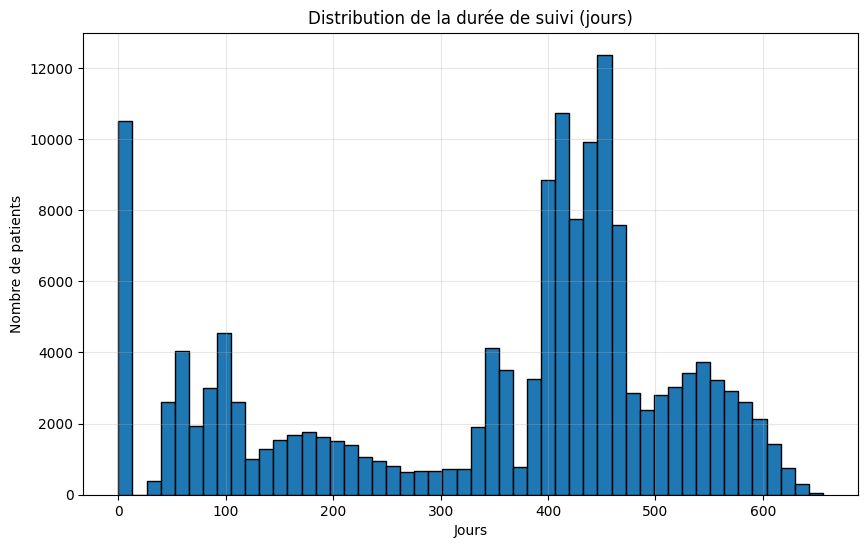

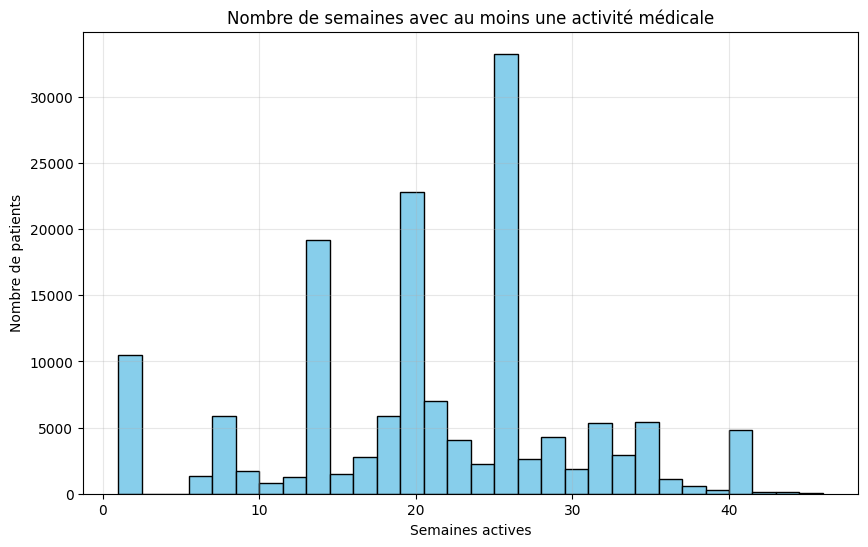

In [19]:
# Charger les métriques
metriques = pd.read_csv('../output/metriques_patients.csv')

# Distribution de la durée de suivi
plt.figure(figsize=(10, 6))
plt.hist(metriques['DUREE_JOURS'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution de la durée de suivi (jours)')
plt.xlabel('Jours')
plt.ylabel('Nombre de patients')
plt.grid(True, alpha=0.3)
plt.show()

# Nombre de semaines actives
plt.figure(figsize=(10, 6))
plt.hist(metriques['NB_SEMAINES_ACTIVES'], bins=30, edgecolor='black', color='skyblue')
plt.title('Nombre de semaines avec au moins une activité médicale')
plt.xlabel('Semaines actives')
plt.ylabel('Nombre de patients')
plt.grid(True, alpha=0.3)
plt.show()

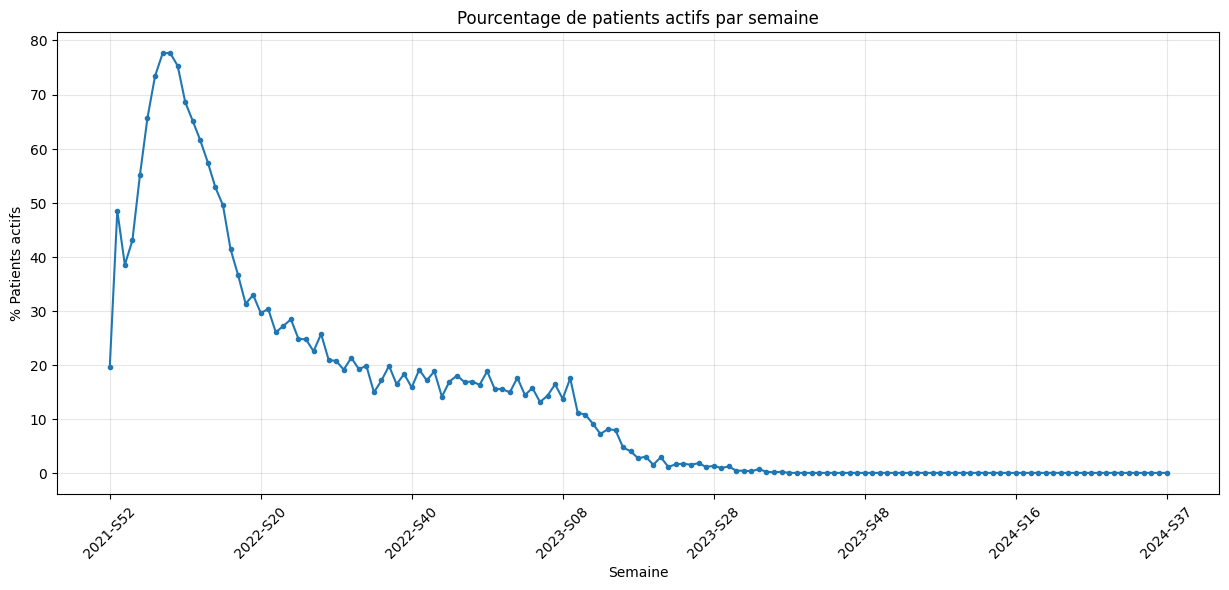

In [20]:
# Charger un échantillon de la matrice
matrice_sample = pd.read_csv('../output/matrice_echantillon.csv')

# Convertir en format long pour analyse
matrice_long = matrice_sample.melt(id_vars=['ID_PATIENT'], 
                                   var_name='SEMAINE', 
                                   value_name='CODES')

# Filtrer les semaines avec données
matrice_long['HAS_DATA'] = matrice_long['CODES'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0) > 0

# Pattern d'activité par semaine
activite_semaine = matrice_long.groupby('SEMAINE')['HAS_DATA'].mean() * 100

plt.figure(figsize=(15, 6))
activite_semaine.plot(kind='line', marker='o', markersize=3)
plt.title('Pourcentage de patients actifs par semaine')
plt.xlabel('Semaine')
plt.ylabel('% Patients actifs')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

ANALYSE DES DIAGNOSTICS PAR SEMAINE (VERSION OPTIMISÉE)

1. Chargement optimisé des données...
   ✓ Fichier chargé: 8,779,889 lignes

2. Préparation rapide des données...

3. Création des semaines...

4. Combinaison des codes...
   Traité 100,000 / 8,779,889 lignes
   Traité 200,000 / 8,779,889 lignes
   Traité 300,000 / 8,779,889 lignes
   Traité 400,000 / 8,779,889 lignes
   Traité 500,000 / 8,779,889 lignes
   Traité 600,000 / 8,779,889 lignes
   Traité 700,000 / 8,779,889 lignes
   Traité 800,000 / 8,779,889 lignes
   Traité 900,000 / 8,779,889 lignes
   Traité 1,000,000 / 8,779,889 lignes
   Traité 1,100,000 / 8,779,889 lignes
   Traité 1,200,000 / 8,779,889 lignes
   Traité 1,300,000 / 8,779,889 lignes
   Traité 1,400,000 / 8,779,889 lignes
   Traité 1,500,000 / 8,779,889 lignes
   Traité 1,600,000 / 8,779,889 lignes
   Traité 1,700,000 / 8,779,889 lignes
   Traité 1,800,000 / 8,779,889 lignes
   Traité 1,900,000 / 8,779,889 lignes
   Traité 2,000,000 / 8,779,889 lignes
   Traité

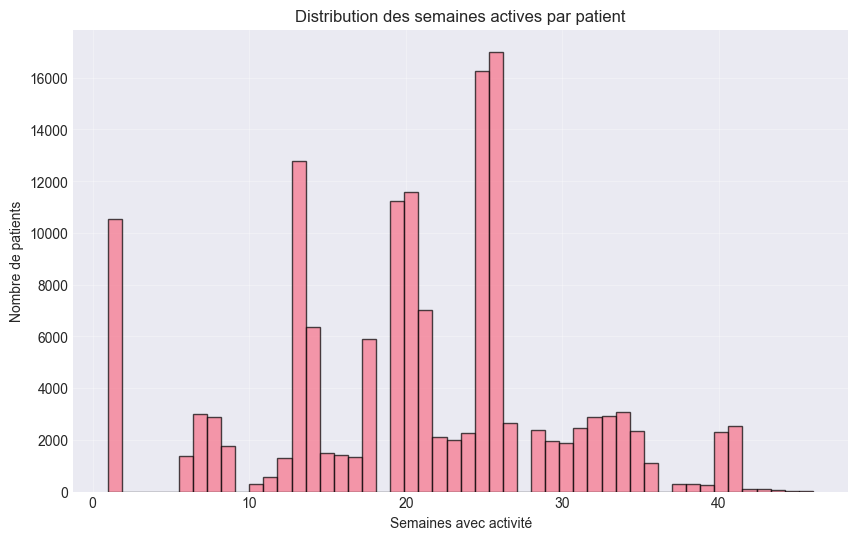

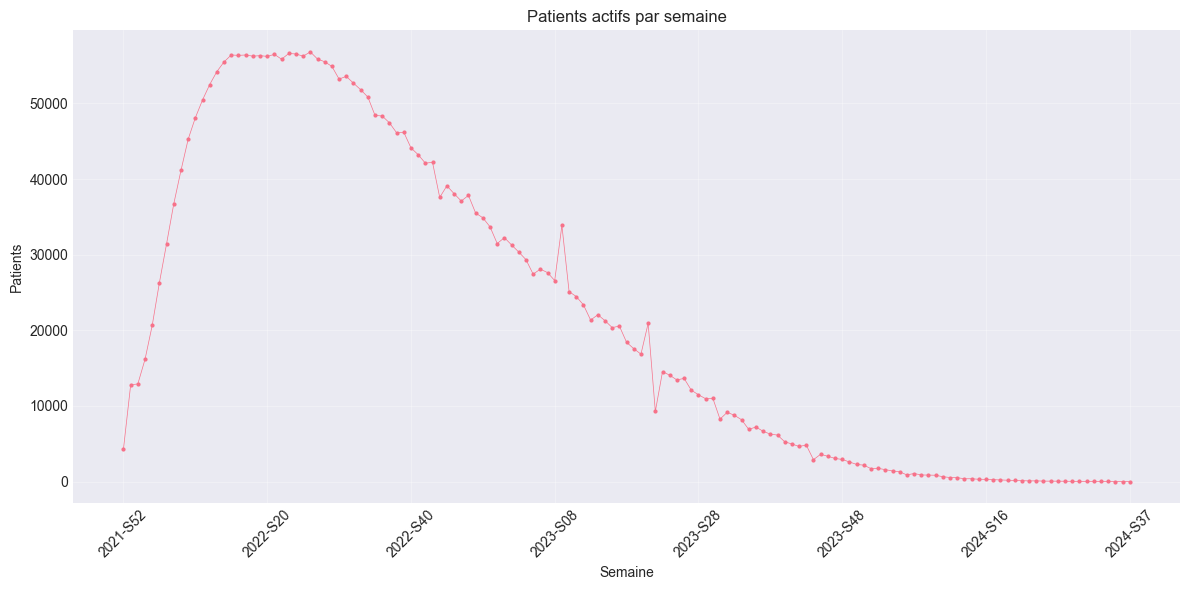


11. Création récapitulatif patients...
   ✓ resume_patients.csv

✅ ANALYSE TERMINÉE EN QUELQUES MINUTES !

📊 RÉSULTATS:
   • Patients analysés: 150,000
   • Période: 2021-S52 à 2024-S37
   • Données groupées: 3,102,339 entrées
   • Codes uniques: 427

📁 FICHIERS:
   • diagnostics_groupes.csv - Toutes données groupées
   • matrice_echantillon.csv - Matrice 500 patients
   • resume_patients.csv - Résumé par patient
   • *.png - Graphiques

🔧 POUR ANALYSER:
   - Un patient: df_grouped[df_grouped['ID_PATIENT'] == 'ID']
   - Une semaine: df_grouped[df_grouped['ANNEE_SEMAINE'] == '2022-S01']
   - Codes patient: df_grouped.loc[df_grouped['ID_PATIENT'] == 'ID', 'CODES_COMBINES']



In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

print("="*80)
print("ANALYSE DES DIAGNOSTICS PAR SEMAINE (VERSION OPTIMISÉE)")
print("="*80)

# 1. CHARGER LES DONNÉES AVEC OPTIMISATION
print("\n1. Chargement optimisé des données...")

try:
    df_dates = pd.read_pickle('../data/BDD.pkl')
    print(f"   ✓ Fichier chargé: {len(df_dates):,} lignes")
except Exception as e:
    print(f"   ✗ Erreur: {e}")
    df_dates = pd.read_csv('../data/BDD.pkl' if 'pkl' in 'BDD.pkl' else '../data/BDD.csv', nrows=1000000)
    print(f"   ✓ Chargement partiel: {len(df_dates):,} lignes")

# 2. PRÉPARATION RAPIDE
print("\n2. Préparation rapide des données...")

df_dates = df_dates.rename(columns={'BEN_IDT_ANO': 'ID_PATIENT', 'DATE': 'DATE_VISITE'})
colonnes_necessaires = ['ID_PATIENT', 'DATE_VISITE', 'COD_ICD10', 'COD_CCAM', 'COD_CIP', 'COD_UCD']
df_dates = df_dates[colonnes_necessaires]
df_dates['DATE_VISITE'] = pd.to_datetime(df_dates['DATE_VISITE'], errors='coerce')

# 3. CRÉER LA SEMAINE
print("\n3. Création des semaines...")

df_dates['ANNEE'] = df_dates['DATE_VISITE'].dt.isocalendar().year
df_dates['SEMAINE'] = df_dates['DATE_VISITE'].dt.isocalendar().week
df_dates['ANNEE_SEMAINE'] = df_dates['ANNEE'].astype(str) + '-S' + df_dates['SEMAINE'].astype(str).str.zfill(2)

# 4. COMBINER LES CODES
print("\n4. Combinaison des codes...")

def combiner_ligne(row):
    codes = []
    if pd.notna(row['COD_ICD10']):
        codes.append(f"ICD10:{row['COD_ICD10']}")
    if pd.notna(row['COD_CCAM']):
        codes.append(f"CCAM:{row['COD_CCAM']}")
    if pd.notna(row['COD_CIP']):
        codes.append(f"CIP:{row['COD_CIP']}")
    if pd.notna(row['COD_UCD']):
        codes.append(f"UCD:{row['COD_UCD']}")
    return ';'.join(codes) if codes else ''

# Appliquer par batch pour éviter la mémoire
batch_size = 100000
all_combined = []

for i in range(0, len(df_dates), batch_size):
    batch = df_dates.iloc[i:i+batch_size]
    combined = batch.apply(combiner_ligne, axis=1)
    all_combined.extend(combined)
    print(f"   Traité {min(i+batch_size, len(df_dates)):,} / {len(df_dates):,} lignes")

df_dates['CODES_COMBINES'] = all_combined

# 5. REGROUPEMENT EFFICACE
print("\n5. Regroupement par patient et semaine...")

# Méthode optimisée avec aggregation
df_grouped = df_dates.groupby(['ID_PATIENT', 'ANNEE_SEMAINE'], as_index=False).agg({
    'CODES_COMBINES': lambda x: ';'.join(filter(None, x))
})

print(f"   ✓ Regroupement terminé: {len(df_grouped):,} groupes")

# 6. CRÉATION MATRICE ÉCHANTILLON
print("\n6. Création de matrice échantillon...")

patients_uniq = df_grouped['ID_PATIENT'].unique()
patients_sample = patients_uniq[:500]  # 500 patients pour test
df_sample = df_grouped[df_grouped['ID_PATIENT'].isin(patients_sample)]

matrice_sample = df_sample.pivot_table(
    index='ID_PATIENT',
    columns='ANNEE_SEMAINE',
    values='CODES_COMBINES',
    aggfunc='first',
    fill_value=''
)

print(f"   ✓ Matrice: {len(matrice_sample)} patients × {len(matrice_sample.columns)} semaines")

# 7. STATISTIQUES
print("\n7. Calcul des statistiques...")

total_patients = df_grouped['ID_PATIENT'].nunique()
total_semaines = df_grouped['ANNEE_SEMAINE'].nunique()
avg_visits = len(df_grouped) / total_patients

print(f"   • Patients: {total_patients:,}")
print(f"   • Semaines: {total_semaines}")
print(f"   • Groupes: {len(df_grouped):,}")
print(f"   • Moyenne visites/patient: {avg_visits:.1f}")

# 8. EXPORT
print("\n8. Export des données...")

os.makedirs('../output_rapide', exist_ok=True)

# Export données groupées
df_grouped.to_csv('../output_rapide/diagnostics_groupes.csv', index=False)
print("   ✓ diagnostics_groupes.csv")

# Export matrice échantillon
matrice_sample.to_csv('../output_rapide/matrice_echantillon.csv')
print("   ✓ matrice_echantillon.csv")

# 9. ANALYSE CODES FRÉQUENTS
print("\n9. Analyse des codes fréquents...")

# Compter tous les codes
all_codes = ';'.join(df_grouped['CODES_COMBINES']).split(';')
all_codes = [c for c in all_codes if c]  # Retirer chaînes vides

from collections import Counter
if all_codes:
    code_counts = Counter(all_codes)
    print(f"\n   Top 10 codes:")
    for code, count in code_counts.most_common(10):
        print(f"   {code}: {count:,}")
else:
    print("   Aucun code trouvé")

# 10. VISUALISATION
print("\n10. Création de graphiques...")

import matplotlib.pyplot as plt

# Distribution visites par patient
visites_par_patient = df_grouped.groupby('ID_PATIENT').size()

plt.figure(figsize=(10, 6))
plt.hist(visites_par_patient.values, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution des semaines actives par patient')
plt.xlabel('Semaines avec activité')
plt.ylabel('Nombre de patients')
plt.grid(True, alpha=0.3)
plt.savefig('../output_rapide/distribution_semaines.png', dpi=150, bbox_inches='tight')
plt.show()

# Patients par semaine
patients_par_semaine = df_grouped.groupby('ANNEE_SEMAINE').size()

plt.figure(figsize=(12, 6))
patients_par_semaine.plot(marker='o', markersize=2, linewidth=0.5)
plt.title('Patients actifs par semaine')
plt.xlabel('Semaine')
plt.ylabel('Patients')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../output_rapide/evolution_patients.png', dpi=150, bbox_inches='tight')
plt.show()

# 11. RÉSUMÉ PAR PATIENT
print("\n11. Création récapitulatif patients...")

patient_summary = df_grouped.groupby('ID_PATIENT').agg(
    NB_SEMAINES=('ANNEE_SEMAINE', 'count'),
    PREMIERE_SEMAINE=('ANNEE_SEMAINE', 'min'),
    DERNIERE_SEMAINE=('ANNEE_SEMAINE', 'max'),
    TOUS_CODES=('CODES_COMBINES', lambda x: ';'.join(x))
).reset_index()

patient_summary.to_csv('../output_rapide/resume_patients.csv', index=False)
print("   ✓ resume_patients.csv")

# 12. FINAL
print("\n" + "="*80)
print("✅ ANALYSE TERMINÉE EN QUELQUES MINUTES !")
print("="*80)

print(f"""
📊 RÉSULTATS:
   • Patients analysés: {total_patients:,}
   • Période: {df_grouped['ANNEE_SEMAINE'].min()} à {df_grouped['ANNEE_SEMAINE'].max()}
   • Données groupées: {len(df_grouped):,} entrées
   • Codes uniques: {len(set(all_codes)) if all_codes else 0}

📁 FICHIERS:
   • diagnostics_groupes.csv - Toutes données groupées
   • matrice_echantillon.csv - Matrice 500 patients
   • resume_patients.csv - Résumé par patient
   • *.png - Graphiques

🔧 POUR ANALYSER:
   - Un patient: df_grouped[df_grouped['ID_PATIENT'] == 'ID']
   - Une semaine: df_grouped[df_grouped['ANNEE_SEMAINE'] == '2022-S01']
   - Codes patient: df_grouped.loc[df_grouped['ID_PATIENT'] == 'ID', 'CODES_COMBINES']
""")